<a href="https://colab.research.google.com/github/aaruma/Intelligent-Systems/blob/main/Arjen_Arumalingam_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

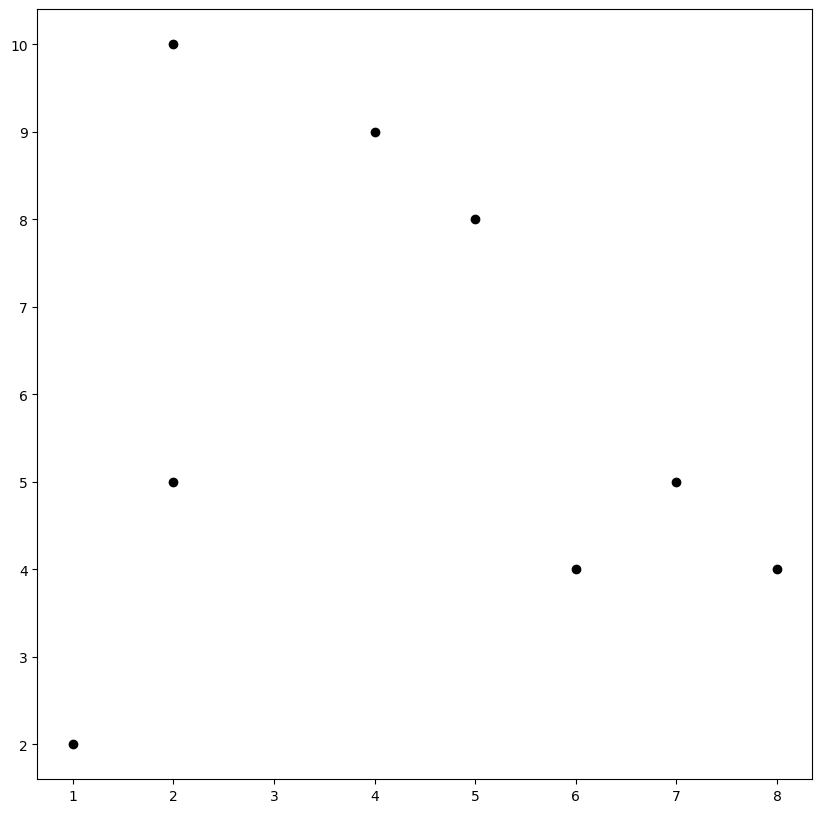

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#  Dataset 1
dataset1 = np.array(
                [[2, 10], # A1
                 [2, 5],  # A2
                 [8, 4],  # A3
                 [5, 8],  # A4
                 [7, 5],  # A5
                 [6, 4],  # A6
                 [1, 2],  # A7
                 [4, 9]   # A8
                ])

#  Dataset 2
url = "https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv"
dataset2 = pd.read_csv(url)

# Initialize cluster initial seeds A2, A3, and A8
initial_seeds = np.array([dataset1[1], dataset1[2], dataset1[7]])

# Assign each data point to the nearest cluster center
def assign_clusters(dataset1, centers):
    data_points = dataset1.shape[0]
    distances = np.zeros((data_points, len(centers)))

    for i in range(data_points):
        for j, center in enumerate(centers):
            distances[i, j] = np.linalg.norm(dataset1[i] - center) # Distance formula

    clusters = np.argmin(distances, axis=1) # Checks for close cluster

    return clusters

# Update the cluster centers
def update_centers(dataset1, cluster_assignments, k):
    num_features = dataset1.shape[1]
    centers = np.zeros((k, num_features))

    for i in range(k):
        cluster_points = dataset1[cluster_assignments == i]
        centers[i] = np.mean(cluster_points, axis=0)
    return centers

# K-Means algorithm for one epoch
def kmeans_one_epoch(dataset1, initial_seeds):
    centers = initial_seeds.copy()

    # Assign data points to clusters
    clusters = assign_clusters(dataset1, centers)

    # Update cluster centers
    centers = update_centers(dataset1, clusters, len(initial_seeds))

    return clusters, centers

# Run K-Means algorithm for one epoch
clusters, centers = kmeans_one_epoch(dataset1, initial_seeds)

# Plotting
plt.figure(figsize=(10, 10))
plt.scatter(dataset1[:, 0], dataset1[:, 1], color='black', label='Data Points')

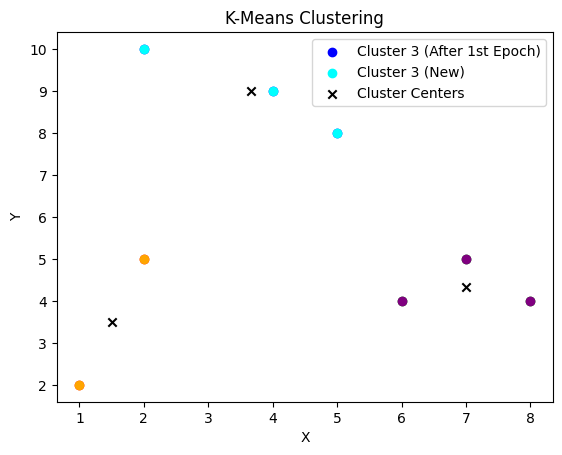

In [ ]:
# Plotting clusters after the first epoch
for i, point in enumerate(dataset1):
    if clusters[i] == 0:
        plt.scatter(point[0], point[1], color='red', label='Cluster 1 (After 1st Epoch)' if i == 0 else None)
    elif clusters[i] == 1:
        plt.scatter(point[0], point[1], color='green', label='Cluster 2 (After 1st Epoch)' if i == 0 else None)
    else:
        plt.scatter(point[0], point[1], color='blue', label='Cluster 3 (After 1st Epoch)' if i == 0 else None)

# Initialize cluster centers with seeds A2, A3, and A8
initial_seeds = np.array([dataset1[1], dataset1[2], dataset1[7]])

# Run K-Means algorithm for one epoch with new seeds
clusters, centers = kmeans_one_epoch(dataset1, initial_seeds)

# Plotting new clusters
for i, point in enumerate(dataset1):
    if clusters[i] == 0:
        plt.scatter(point[0], point[1], color='orange', label='Cluster 1 (New)' if i == 0 else None)
    elif clusters[i] == 1:
        plt.scatter(point[0], point[1], color='purple', label='Cluster 2 (New)' if i == 0 else None)
    else:
        plt.scatter(point[0], point[1], color='cyan', label='Cluster 3 (New)' if i == 0 else None)

plt.scatter(centers[:, 0], centers[:, 1], color='black', marker='x', label='Cluster Centers')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

In [ ]:
new_cluster = []

for i in range(len(initial_seeds)):
    new_cluster.append(dataset1[clusters == i])

print ("Q1.")
for i, cluster in enumerate(new_cluster):
    print(f"Cluster {i+1} \nExamples:\n{cluster} \n")

Q1.
Cluster 1 
Examples:
[[2 5]
 [1 2]] 

Cluster 2 
Examples:
[[8 4]
 [7 5]
 [6 4]] 

Cluster 3 
Examples:
[[ 2 10]
 [ 5  8]
 [ 4  9]] 



In [ ]:
print("Q2. Centers of the New Clusters:\n")
for i, center in enumerate(centers):
    print(f"Cluster {i+1}\nCenter: {center}\n")

Q2. Centers of the New Clusters:

Cluster 1
Center: [1.5 3.5]

Cluster 2
Center: [7.         4.33333333]

Cluster 3
Center: [3.66666667 9.        ]




Q5. Epoch 1:

Point 1 - Cluster 3
Point 2 - Cluster 1
Point 3 - Cluster 2
Point 4 - Cluster 3
Point 5 - Cluster 2
Point 6 - Cluster 2
Point 7 - Cluster 1
Point 8 - Cluster 3

Q5. Epoch 2:

Point 1 - Cluster 3
Point 2 - Cluster 1
Point 3 - Cluster 2
Point 4 - Cluster 3
Point 5 - Cluster 2
Point 6 - Cluster 2
Point 7 - Cluster 1
Point 8 - Cluster 3


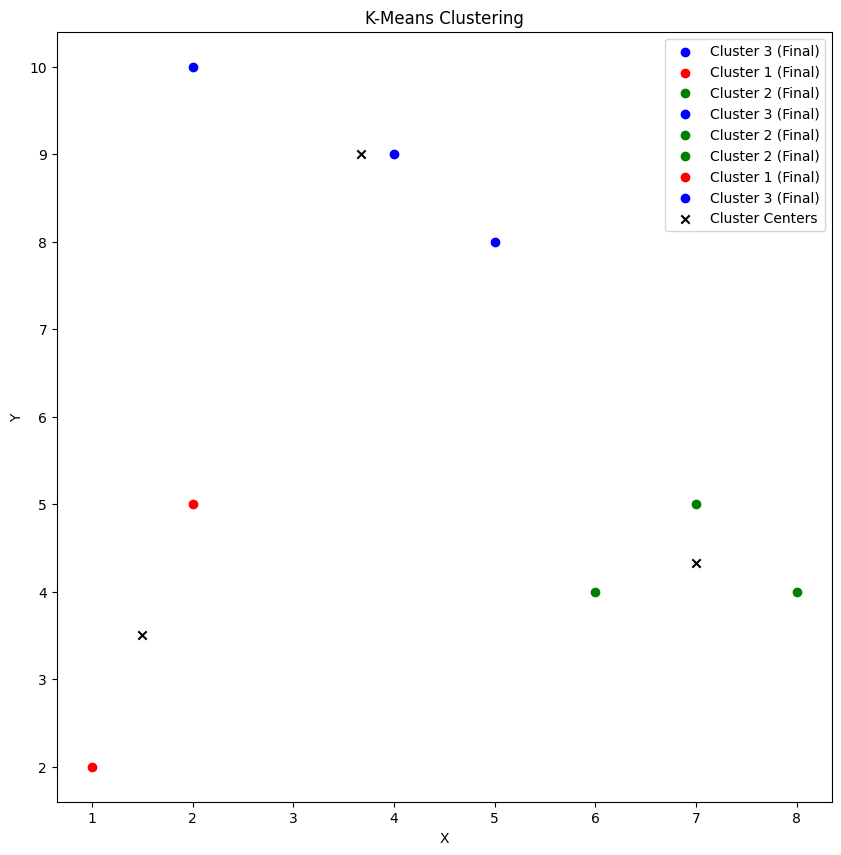


Q4. Number of iterations to converge: 2


In [ ]:
# K-Means algorithm for multiple epochs until convergence
def kmeans(dataset1, initial_seeds):
    centers = initial_seeds.copy()
    num_epochs = 0
    converged = False
    cluster_assignments_prev = None

    while not converged:
        # Assign data points to clusters
        cluster_assignments = assign_clusters(dataset1, centers)

        # Check convergence
        if np.array_equal(cluster_assignments, cluster_assignments_prev):
            converged = True

        # Update cluster centers
        centers = update_centers(dataset1, cluster_assignments, len(initial_seeds))

        # Print cluster assignments for each epoch
        print(f"\nQ5. Epoch {num_epochs + 1}:\n")
        for i, point in enumerate(dataset1):
            cluster_type = cluster_assignments[i] + 1
            print(f"Point {i+1} - Cluster {cluster_type}")

        # Increment epoch counter
        num_epochs += 1
        cluster_assignments_prev = cluster_assignments.copy()

    return cluster_assignments, centers, num_epochs

# Run K-Means algorithm until convergence
cluster_assignments, centers, num_epochs = kmeans(dataset1, initial_seeds)

# Plotting
plt.figure(figsize=(10, 10))

# Plotting clusters after the final epoch
for i, point in enumerate(dataset1):
    if cluster_assignments[i] == 0:
        plt.scatter(point[0], point[1], color='red', label='Cluster 1 (Final)')
    elif cluster_assignments[i] == 1:
        plt.scatter(point[0], point[1], color='green', label='Cluster 2 (Final)')
    else:
        plt.scatter(point[0], point[1], color='blue', label='Cluster 3 (Final)')

plt.scatter(centers[:, 0], centers[:, 1], color='black', marker='x', label='Cluster Centers')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

print(f"\nQ4. Number of iterations to converge: {num_epochs}")


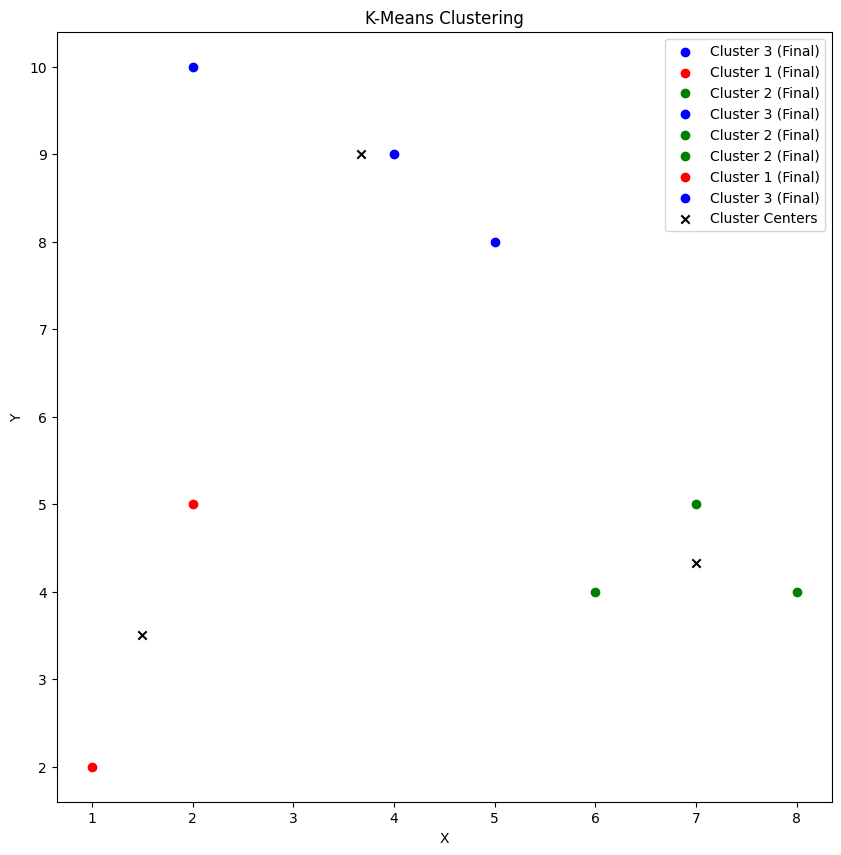

In [ ]:
# K-Means algorithm for a fixed number of epochs
def kmeans_fixed_epochs(dataset1, initial_seeds, num_epochs):
    centers = initial_seeds.copy()

    for epoch in range(num_epochs):
        # Assign data points to clusters
        cluster_assignments = assign_clusters(dataset1, centers)

        # Update cluster centers
        centers = update_centers(dataset1, cluster_assignments, len(initial_seeds))

    return cluster_assignments, centers

# Run K-Means algorithm for the specified number of epochs
num_epochs = 2
cluster_assignments, centers = kmeans_fixed_epochs(dataset1, initial_seeds, num_epochs)

# Plotting
plt.figure(figsize=(10, 10))

# Plotting clusters after convergence
for i, point in enumerate(dataset1):
    if cluster_assignments[i] == 0:
        plt.scatter(point[0], point[1], color='red', label='Cluster 1 (Final)')
    elif cluster_assignments[i] == 1:
        plt.scatter(point[0], point[1], color='green', label='Cluster 2 (Final)')
    else:
        plt.scatter(point[0], point[1], color='blue', label='Cluster 3 (Final)')

plt.scatter(centers[:, 0], centers[:, 1], color='black', marker='x', label='Cluster Centers')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

**Dataset 2: Q6-Q8**

In [ ]:
# Select features for clustering
features = ['sbp', 'tobacco']
data = dataset2[features].values

# Separate training and testing data
train_data = data[:300] # First 300 rows of data
test_data = data[300:]  # Remaining data

# K-Means algorithm
def kmeans(data, k, num_epochs):
    num_samples, num_features = data.shape

    # Initialize cluster centers randomly
    np.random.seed(42)
    centers = np.random.randn(k, num_features)

    for epoch in range(num_epochs):
        # Step 1: Assign each data point to the nearest cluster center
        cluster_assignments = assign_clusters(data, centers)

        # Step 2: Update the cluster centers
        centers = update_centers(data, cluster_assignments, k)

    return cluster_assignments, centers


In [ ]:
# Step 1: Assign each data point to the nearest cluster center
def assign_clusters(data, centers):
    num_samples = data.shape[0]
    distances = np.zeros((num_samples, len(centers)))

    for i in range(num_samples):
        for j, center in enumerate(centers):
            distances[i, j] = np.linalg.norm(data[i] - center)

    cluster_assignments = np.argmin(distances, axis=1)

    return cluster_assignments

In [ ]:
# Step 2: Update the cluster centers
def update_centers(data, cluster_assignments, k):
    num_features = data.shape[1]
    centers = np.zeros((k, num_features))

    for i in range(k):
        cluster_points = data[cluster_assignments == i]
        centers[i] = np.mean(cluster_points, axis=0)
    return centers

# Perform K-Means clustering
k = 2
num_epochs = 10
cluster_assignments, centers = kmeans(train_data, k, num_epochs)

# Assign cluster labels to training and testing data
train_labels = cluster_assignments
test_labels = assign_clusters(test_data, centers)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [ ]:
# Q6: Accuracy calculation
train_true_labels = dataset2['chd'].values[:300]  # Ground truth labels for training data
test_true_labels = dataset2['chd'].values[300:]  # Ground truth labels for testing data
train_accuracy = np.mean(train_true_labels == train_labels)
test_accuracy = np.mean(test_true_labels == test_labels)
print(f"Training accuracy for K-Means Clustering: {train_accuracy}\n")
print(f"Testing accuracy for K-Means Clustering: {test_accuracy}")

Training accuracy for K-Means Clustering: 0.6333333333333333

Testing accuracy for K-Means Clustering: 0.30864197530864196


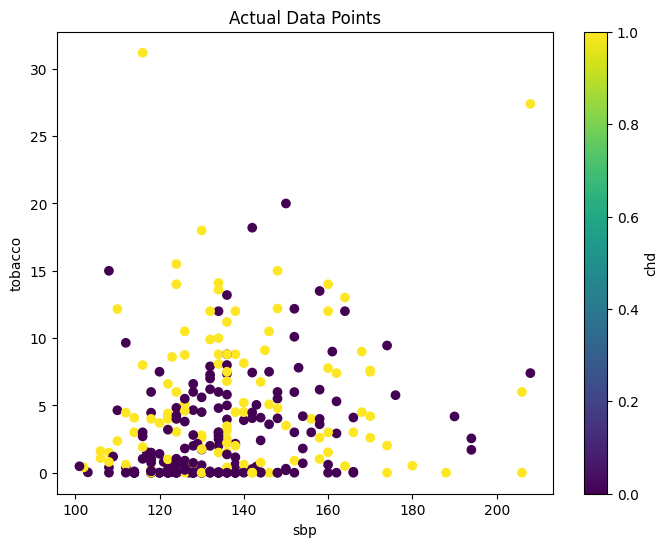

In [ ]:
# Q7: Plot 'sbp' vs 'tobacco' with actual data points
plt.figure(figsize=(8, 6))
plt.scatter(dataset2['sbp'][:300], dataset2['tobacco'][:300], c=dataset2['chd'][:300], cmap='viridis')
plt.xlabel('sbp')
plt.ylabel('tobacco')
plt.title('Actual Data Points')
plt.colorbar(label='chd')
plt.show()

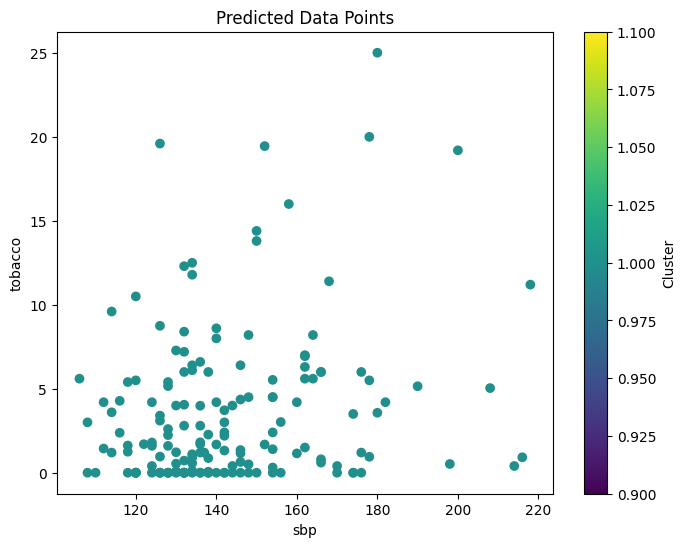

In [ ]:
# Q8: Plot 'sbp' vs 'tobacco' with predicted data points
plt.figure(figsize=(8, 6))
plt.scatter(dataset2['sbp'][300:], dataset2['tobacco'][300:], c=test_labels, cmap='viridis')
plt.xlabel('sbp')
plt.ylabel('tobacco')
plt.title('Predicted Data Points')
plt.colorbar(label='Cluster')
plt.show()

**Part B**

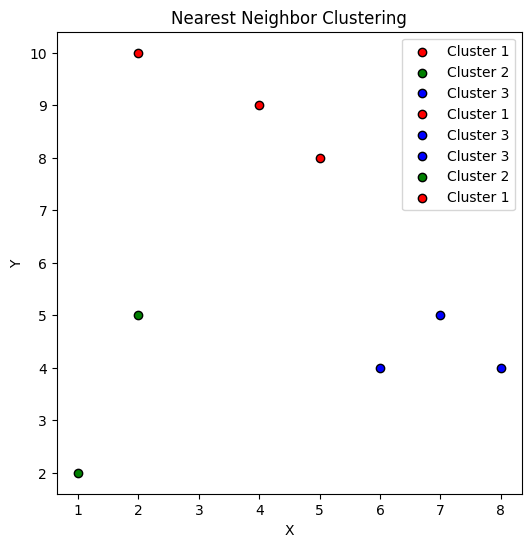

In [ ]:
# Nearest Neighbor clustering algorithm
def nn_clustering(dataset1, threshold):
    num_samples = dataset1.shape[0]
    clusters = [-1] * num_samples  # Cluster assignments, -1 indicates unassigned
    cluster_count = 0  # Current cluster count

    for i in range(num_samples):
        if clusters[i] == -1:  # Unassigned data point
            clusters[i] = cluster_count  # Assign to a new cluster
            cluster_count += 1

        for j in range(num_samples):
            if i != j and clusters[j] == -1:  # Unassigned data point
                dist = np.linalg.norm(dataset1[i] - dataset1[j])  # Euclidean distance
                if dist <= threshold:
                    clusters[j] = clusters[i]  # Assign to the same cluster
    return clusters

# Perform Nearest Neighbor clustering
threshold = 4
clusters = nn_clustering(dataset1, threshold)

# Plotting the clusters
plt.figure(figsize=(6, 6))
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8']

for i, point in enumerate(dataset1):
    cluster = clusters[i]
    plt.scatter(point[0], point[1], color=colors[cluster], edgecolor='black', label=labels[cluster])

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Nearest Neighbor Clustering')
plt.legend()
plt.show()

**Q9 - Same results as k-means?**

The results for the plot from the k-means algorithm are the same result.

**Q11 - Perfomance of K-means and NN/Disadvantages of algorithms on bigger datasets**

**Performance Comparison:**

*   K-means clustering is an iterative technique that seeks a local optimum by minimizing the sum of squares inside each cluster. It converges a solution, even though it is sensitive to the initial cluster centroids and may become trapped in suboptimal solutions.

* Nearest Neighbour (NN) clustering allocates each data point to a cluster based on its closest neighbour within a certain distance. It is a simple method, but it can be influenced by noise and outliers.



**Disadvantage on larger datasets**

**K-means clustering:**
*   Scalability:
> As the dataset size grows, the computing cost of K-means increases considerably. It necessitates computing distances between each data point and each cluster centre, which results in a quadratic time complexity.


* Memory Usage:
>K-means involves storing the complete dataset and cluster centres in memory, which might be a problem for huge datasets that do not fit in memory. Sensitivity to Initialization: K-means can be sensitive to cluster centroids' initial selection, resulting in varying outcomes depending on the initialization. To achieve the best possible outcomes, proper initialization approaches are required.

**Nearest Neighbor (NN) clustering:**
* Computational Complexity:
>The Nearest Neighbor clustering technique has a temporal complexity of O(N^2), where N is the number of data points. This is because it compares each data point to every other data point. The computing cost gets unaffordable as dataset size grows. Threshold Selection: The threshold distance has a significant impact on how well NN clustering performs. Selecting a threshold number that works can be difficult, particularly for datasets that have irregular clusters or changing densities.

* Noise Sensitivity:
> NN clustering assigns data points only based on proximity, it is susceptible to noise and outliers. Unwanted clusters may emerge or improper cluster assignments may arise from outliers or noisy points.

In [ ]:
# Extract 'sbp', 'tobacco', and 'chd' columns
df = dataset2[['sbp', 'tobacco', 'chd']]

# Split the data into training and testing sets
train_data = df.iloc[:300]
test_data = df.iloc[300:]

# Nearest Neighbor clustering algorithm
def nn_clustering(train_data, test_data, threshold):
    clusters = []
    for i in range(len(test_data)):
        min_dist = np.inf
        min_cluster = None
        for j in range(len(train_data)):
            dist = np.sqrt((test_data.iloc[i]['sbp'] - train_data.iloc[j]['sbp']) ** 2 +
                           (test_data.iloc[i]['tobacco'] - train_data.iloc[j]['tobacco']) ** 2)
            if dist < min_dist:
                min_dist = dist
                min_cluster = train_data.iloc[j]['chd']
        clusters.append(min_cluster)
    return clusters

# Perform Nearest Neighbor clustering
threshold = 4
clusters = nn_clustering(train_data, test_data, threshold)

# Calculate accuracy
accuracy = sum(clusters == test_data['chd']) / len(test_data) * 100

# Print accuracy
print(f"Accuracy for NN clustering: {accuracy:.2f}%")

Accuracy for NN clustering: 56.17%


**Part C**

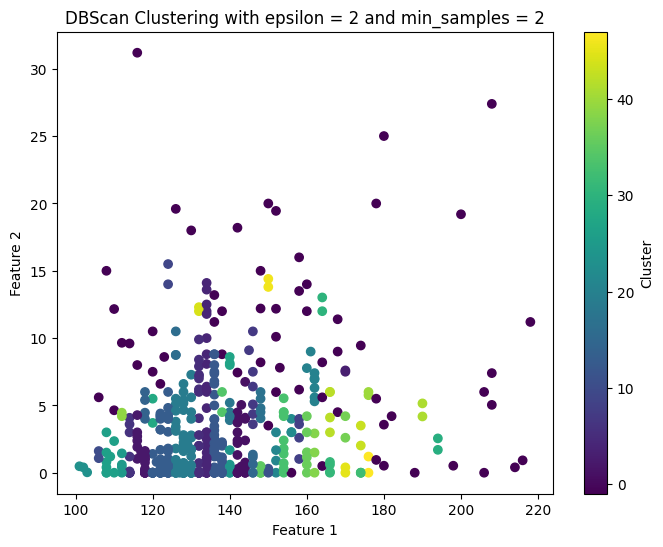

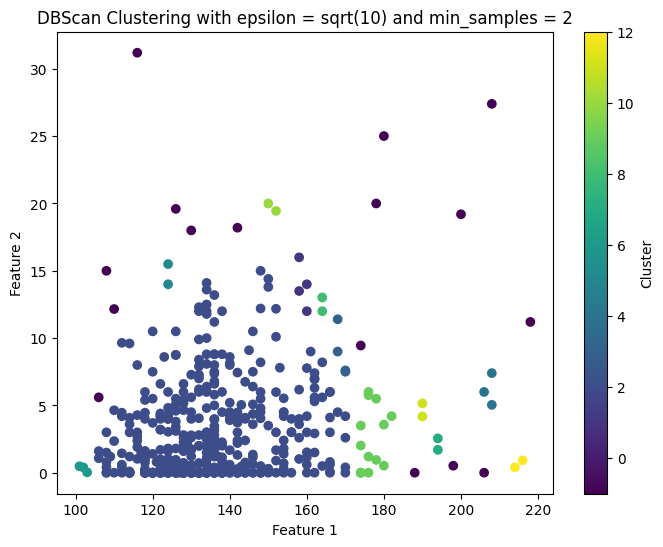

In [ ]:
# Function to calculate Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

# Function to find neighboring points within epsilon distance
def find_neighbors(data, point_index, epsilon):
    neighbors = []
    for i in range(len(data)):
        if euclidean_distance(data[point_index], data[i]) < epsilon:
            neighbors.append(i)
    return neighbors

# Function to expand cluster from a seed point
def expand_cluster(data, labels, point_index, cluster_id, epsilon, min_samples):
    neighbors = find_neighbors(data, point_index, epsilon)
    if len(neighbors) < min_samples:
        labels[point_index] = -1  # Mark as noise
        return False
    else:
        labels[point_index] = cluster_id
        for neighbor in neighbors:
            if labels[neighbor] == 0:  # 0 indicates unvisited
                labels[neighbor] = cluster_id
                expand_cluster(data, labels, neighbor, cluster_id, epsilon, min_samples)
        return True

# Function to perform DBScan clustering
def dbscan(data, epsilon, min_samples):
    labels = np.zeros(len(data))  # 0 indicates unvisited
    cluster_id = 0
    for i in range(len(data)):
        if labels[i] == 0:  # 0 indicates unvisited
            if expand_cluster(data, labels, i, cluster_id + 1, epsilon, min_samples):
                cluster_id += 1
    return labels

# Q13. DBScan with epsilon = 2 and min_samples = 2
labels_13 = dbscan(data, epsilon=2, min_samples=2)

# Plotting clusters for Q13
plt.figure(figsize=(8, 6))
plt.scatter(data[:,0], data[:,1], c=labels_13, cmap='viridis')
plt.title('DBScan Clustering with epsilon = 2 and min_samples = 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

# Q14. DBScan with epsilon = sqrt(10) and min_samples = 2
labels_14 = dbscan(data, epsilon=np.sqrt(10), min_samples=2)

# Plotting clusters for Q14
plt.figure(figsize=(8, 6))
plt.scatter(data[:,0], data[:,1], c=labels_14, cmap='viridis')
plt.title('DBScan Clustering with epsilon = sqrt(10) and min_samples = 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
# Dataset2
df = pd.read_csv('https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv')

# Select required data
X = df[['sbp', 'tobacco']].values

# Distance function (Euclidean distance)
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

# DBScan clustering
def dbscan(X, eps, min_samples):
    labels = np.zeros(len(X), dtype=int)
    cluster_id = 0
    for i, x in enumerate(X):
        if labels[i] != 0:
            continue
        neighbors = get_neighbors(X, i, eps)
        if len(neighbors) < min_samples:
            labels[i] = -1  # Noise point
            continue
        cluster_id += 1
        labels[i] = cluster_id
        expand_cluster(X, labels, i, neighbors, cluster_id, eps, min_samples)
    return labels

# Get neighbors of a point
def get_neighbors(X, i, eps):
    neighbors = []
    for j, x in enumerate(X):
        if euclidean_distance(X[i], x) < eps:
            neighbors.append(j)
    return neighbors

# Expand cluster
def expand_cluster(X, labels, i, neighbors, cluster_id, eps, min_samples):
    for j in neighbors:
        if labels[j] == -1:
            labels[j] = cluster_id
        elif labels[j] == 0:
            labels[j] = cluster_id
            new_neighbors = get_neighbors(X, j, eps)
            if len(new_neighbors) >= min_samples:
                neighbors.extend(new_neighbors)

# Split into training and testing sets
X_train = X[:300]
X_test = X[300:]

# DBScan clustering
eps = np.sqrt(10)
min_samples = 2
train_labels = dbscan(X_train, eps, min_samples)

# Predict cluster labels for testing set
test_labels = np.zeros(len(X_test), dtype=int)
for i, x in enumerate(X_test):
    neighbors = get_neighbors(X_train, i, eps)
    if len(neighbors) < min_samples:
        test_labels[i] = -1  # Noise point
        continue
    cluster_ids = [train_labels[n] for n in neighbors]
    unique_cluster_ids = np.unique(cluster_ids)
    if len(unique_cluster_ids) == 1 and unique_cluster_ids[0] == -1:
        test_labels[i] = -1  # Noise point
    else:
        test_labels[i] = np.argmax(np.bincount(cluster_ids))

# Convert labels to binary (0 or 1) based on the majority class in training set
train_labels_binary = np.array([1 if x > 0 else 0 for x in train_labels])
test_labels_binary = np.array([1 if x > 0 else 0 for x in test_labels])

# Calculate accuracy
accuracy = np.mean(test_labels_binary == df['chd'].values[300:])

print("Accuracy for DBScan:", accuracy)

Accuracy for DBScan: 0.3271604938271605


**Part D - Verification**

***K-means***

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


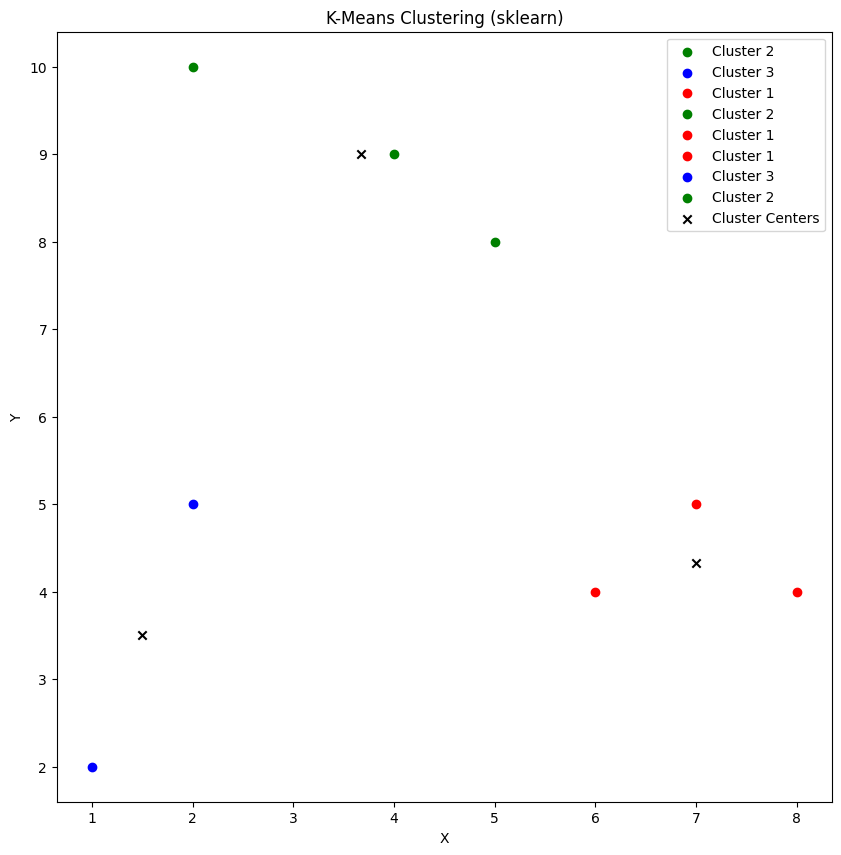

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Dataset
data = np.array(
        [[2, 10], # A1
          [2, 5],  # A2
          [8, 4],  # A3
          [5, 8],  # A4
          [7, 5],  # A5
          [6, 4],  # A6
          [1, 2],  # A7
          [4, 9]   # A8
        ])

# Create KMeans instance with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)

# Fit the data to the KMeans model
kmeans.fit(data)

# Get the cluster labels and cluster centers
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Plotting
plt.figure(figsize=(10, 10))

# Plotting clusters
for i, point in enumerate(data):
    if cluster_labels[i] == 0:
        plt.scatter(point[0], point[1], color='red', label='Cluster 1')
    elif cluster_labels[i] == 1:
        plt.scatter(point[0], point[1], color='green', label='Cluster 2')
    else:
        plt.scatter(point[0], point[1], color='blue', label='Cluster 3')

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], color='black', marker='x', label='Cluster Centers')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-Means Clustering (sklearn)')
plt.legend()
plt.show()

*NN Clustering (Nearest Neighbor)*

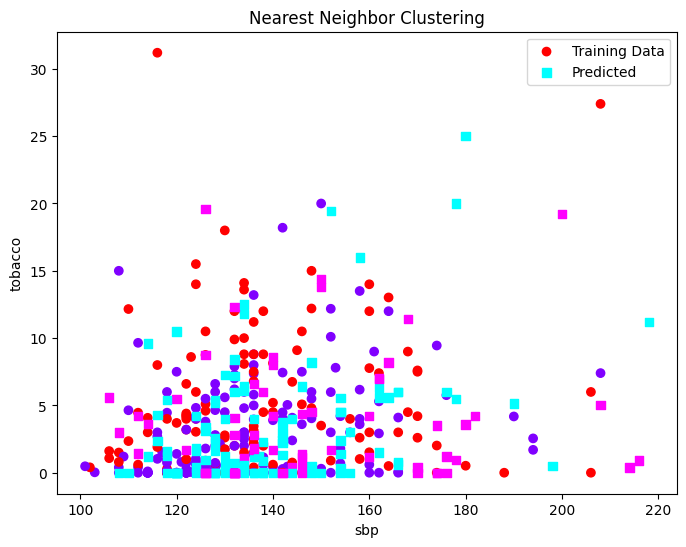

Accuracy: 56.17%


In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load Dataset 2
url = 'https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv'
data = pd.read_csv(url)

# Extract 'sbp', 'tobacco', and 'chd' columns
df = data[['sbp', 'tobacco', 'chd']]

# Split the data into training and testing sets
train_data = df.iloc[:300]
test_data = df.iloc[300:]

# Perform Nearest Neighbor clustering using scikit-learn
X_train = train_data[['sbp', 'tobacco']]
y_train = train_data['chd']
X_test = test_data[['sbp', 'tobacco']]
y_test = test_data['chd']

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

# Calculate accuracy using scikit-learn
accuracy = accuracy_score(y_test, predictions) * 100

# Plotting the data points with cluster assignments
plt.figure(figsize=(8, 6))
plt.scatter(train_data['sbp'], train_data['tobacco'], c=train_data['chd'], cmap='rainbow', label='Training Data')
plt.scatter(X_test['sbp'], X_test['tobacco'], c=predictions, cmap='cool', marker='s', label='Predicted')
plt.xlabel('sbp')
plt.ylabel('tobacco')
plt.title('Nearest Neighbor Clustering')
plt.legend()
plt.show()

# Print accuracy
print(f"Accuracy: {accuracy:.2f}%")


**DBScan Clustering**

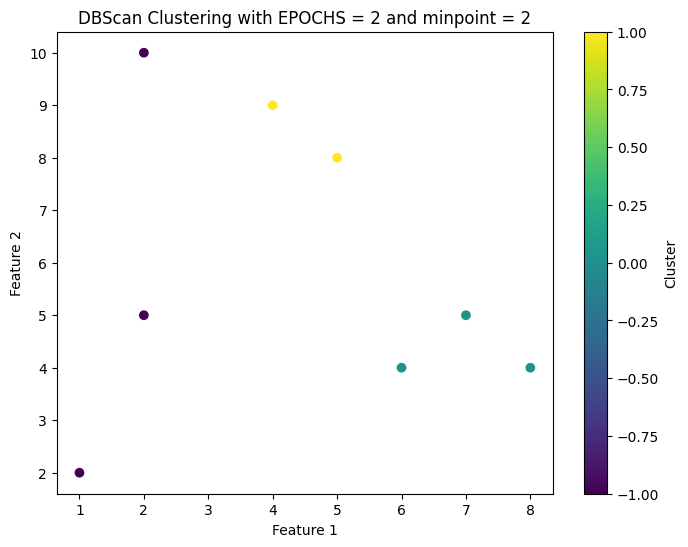

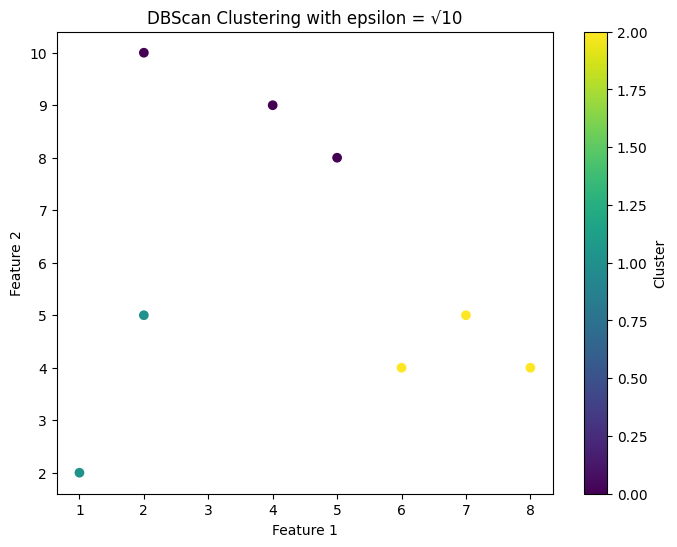

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Dataset
data = np.array([[2, 10],
                 [2, 5],
                 [8, 4],
                 [5, 8],
                 [7, 5],
                 [6, 4],
                 [1, 2],
                 [4, 9]])

# DBScan with EPOCHS = 2 and minpoint = 2
dbscan = DBSCAN(eps=2, min_samples=2, metric='euclidean')
dbscan.fit(data)
labels = dbscan.labels_

# Plotting clusters
plt.figure(figsize=(8, 6))
plt.scatter(data[:,0], data[:,1], c=labels, cmap='viridis')
plt.title('DBScan Clustering with EPOCHS = 2 and minpoint = 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

# DBScan with epsilon = √10
dbscan = DBSCAN(eps=np.sqrt(10), min_samples=2, metric='euclidean')
dbscan.fit(data)
labels = dbscan.labels_

# Plotting clusters
plt.figure(figsize=(8, 6))
plt.scatter(data[:,0], data[:,1], c=labels, cmap='viridis')
plt.title('DBScan Clustering with epsilon = √10')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()


1) What are the different metrics used to evaluate the performance of different clustering algorithms?

Some metrics used to evaluate the performance of clustering algorithms such as Silhouetter score, and Dunn's index. Silhouette score measures how similar an object is to its own cluster compared to other clusters, while Dunn Index measures the ratio of the distance between clusters to the distance within clusters.



2) Instead of accuracy, what other ways can we evaluate the performance of three algorithms in lab 3?

Instead of accuracy, some alternative ways we can evaluate the performance of three algorithms in lab 3 are the Silhouette score and Visual Inspection. Silhouette score measures how similar an object is to its own cluster compared to other clusters, while Visual Inspection plots the clusters, and visually inspects them providing information of the performance of the clustering algorithm.